In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Datasets/data.csv',encoding='ISO-8859-1')

In [3]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [4]:
df=df.dropna(subset=['CustomerID'])

In [73]:
df['CustomerID']=df['CustomerID'].astype(int)

In [6]:
df['InvoiceYearMonth']=df['InvoiceDate'].dt.to_period('M')

In [8]:
cohort_data=df.groupby('CustomerID')['InvoiceYearMonth'].min().reset_index()

In [9]:
cohort_data

,CustomerID,InvoiceYearMonth
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02
...,...,...
4367,18280,2011-03
4368,18281,2011-06
4369,18282,2011-08
4370,18283,2011-01


In [10]:
cohort_data.rename(columns={'InvoiceYearMonth': 'CohortMonth'}, inplace=True)

In [11]:
df=df.merge(cohort_data,on='CustomerID')

In [12]:
df[['CustomerID','InvoiceDate','CohortMonth']].head()

,CustomerID,InvoiceDate,CohortMonth
0,17850,2010-12-01 08:26:00,2010-12
1,17850,2010-12-01 08:26:00,2010-12
2,17850,2010-12-01 08:26:00,2010-12
3,17850,2010-12-01 08:26:00,2010-12
4,17850,2010-12-01 08:26:00,2010-12


In [13]:
df['InvoiceYear']=df['InvoiceDate'].dt.year
df['InvoiceMonth']=df['InvoiceDate'].dt.month

In [15]:
df['CohortYear']=df['CohortMonth'].dt.year
df['CohortMonthNum']=df['CohortMonth'].dt.month

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,CohortMonth,InvoiceYear,InvoiceMonth,CohortYear,CohortMonthNum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010-12,2010,12,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12,2010,12,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010-12,2010,12,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12,2010,12,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12,2010,12,2010,12


In [17]:
df['CohortIndex']=(df['InvoiceYear'] - df['CohortYear'])*12+(df['InvoiceMonth']-df['CohortMonthNum'])+1

In [18]:
df[['CustomerID', 'InvoiceDate', 'CohortMonth', 'CohortIndex']]

,CustomerID,InvoiceDate,CohortMonth,CohortIndex
0,17850,2010-12-01 08:26:00,2010-12,1
1,17850,2010-12-01 08:26:00,2010-12,1
2,17850,2010-12-01 08:26:00,2010-12,1
3,17850,2010-12-01 08:26:00,2010-12,1
4,17850,2010-12-01 08:26:00,2010-12,1
...,...,...,...,...
406824,12680,2011-12-09 12:50:00,2011-08,5
406825,12680,2011-12-09 12:50:00,2011-08,5
406826,12680,2011-12-09 12:50:00,2011-08,5
406827,12680,2011-12-09 12:50:00,2011-08,5


In [69]:
cohort_count=df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].nunique().unstack(0)
cohort_count

CohortMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortIndex,,,,,,,,,,,,,
1,948.0,421.0,380.0,440.0,299.0,279.0,235.0,191.0,167.0,298.0,352.0,321.0,41.0
2,362.0,101.0,94.0,84.0,68.0,66.0,49.0,40.0,42.0,89.0,93.0,43.0,NaN
3,317.0,119.0,73.0,112.0,66.0,48.0,44.0,39.0,42.0,97.0,46.0,NaN,NaN
4,367.0,102.0,106.0,96.0,63.0,48.0,64.0,44.0,42.0,36.0,NaN,NaN,NaN
5,341.0,138.0,102.0,102.0,62.0,60.0,58.0,52.0,23.0,NaN,NaN,NaN,NaN
6,376.0,126.0,94.0,78.0,71.0,68.0,79.0,22.0,NaN,NaN,NaN,NaN,NaN
7,360.0,110.0,97.0,116.0,69.0,74.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
8,336.0,108.0,107.0,105.0,78.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,336.0,131.0,98.0,127.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
cohort_size=cohort_count.iloc[0]
retention_matrix=cohort_count.divide(cohort_size,axis=1).round(3)*100

In [71]:
retention_matrix

CohortMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortIndex,,,,,,,,,,,,,
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,38.2,24.0,24.7,19.1,22.7,23.7,20.9,20.9,25.1,29.9,26.4,13.4,NaN
3,33.4,28.3,19.2,25.5,22.1,17.2,18.7,20.4,25.1,32.6,13.1,NaN,NaN
4,38.7,24.2,27.9,21.8,21.1,17.2,27.2,23.0,25.1,12.1,NaN,NaN,NaN
5,36.0,32.8,26.8,23.2,20.7,21.5,24.7,27.2,13.8,NaN,NaN,NaN,NaN
6,39.7,29.9,24.7,17.7,23.7,24.4,33.6,11.5,NaN,NaN,NaN,NaN,NaN
7,38.0,26.1,25.5,26.4,23.1,26.5,10.2,NaN,NaN,NaN,NaN,NaN,NaN
8,35.4,25.7,28.2,23.9,26.1,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,35.4,31.1,25.8,28.9,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


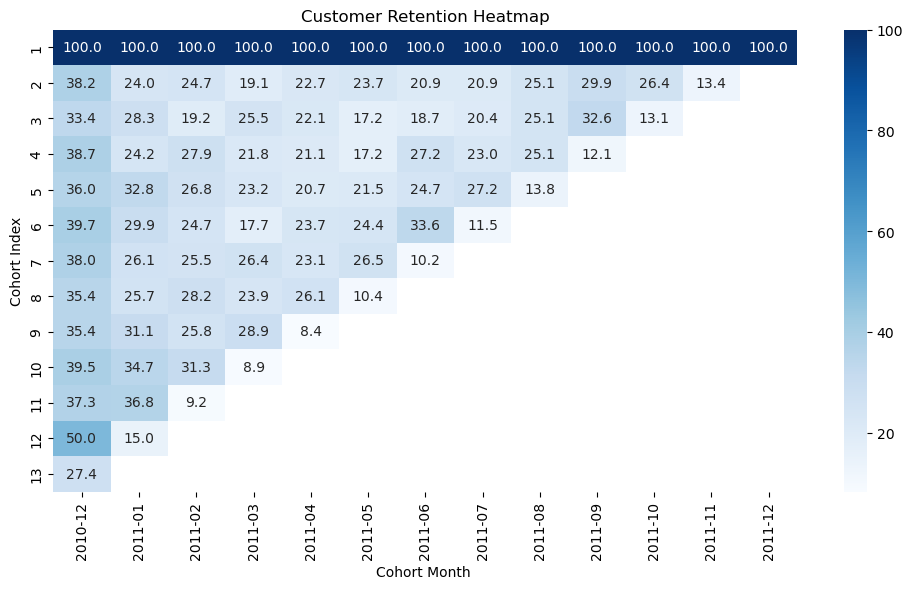

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(retention_matrix,annot = True,fmt='.1f',cmap='Blues')
plt.title('Customer Retention Heatmap')
plt.xlabel('Cohort Month ')
plt.ylabel('Cohort Index')
plt.savefig("cohort_heatmap.png", dpi=300, bbox_inches="tight") 
plt.show()

In [74]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [31]:
Customer_Revenue= df.groupby('CustomerID')['TotalAmount'].sum()

In [34]:
customer_purchase = df.groupby('CustomerID')['InvoiceNo'].nunique()

In [45]:
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min()
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()
customer_lifespan = ((last_purchase - first_purchase) / np.timedelta64(30, 'D')).round()

In [47]:
customer_lifespan = customer_lifespan.replace(0,1)

In [48]:
average_order_value= Customer_Revenue/customer_purchase

In [49]:
Individual_clv=average_order_value*customer_purchase/customer_lifespan

In [54]:
Individual_clv=Individual_clv.fillna(Individual_clv.mean())

In [63]:
Top_Individual_clv=Individual_clv.sort_values(ascending=False).head(10) 

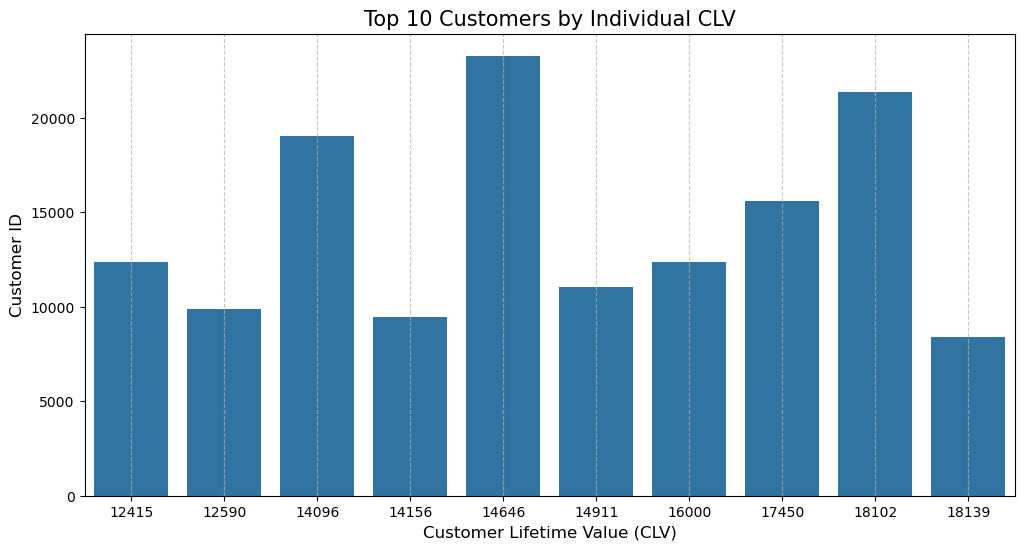

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_Individual_clv.index, y=Top_Individual_clv.values)

plt.xlabel("Customer Lifetime Value (CLV)", fontsize=12)
plt.ylabel("Customer ID", fontsize=12)
plt.title("Top 10 Customers by Individual CLV", fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
